In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math
import random
import seaborn as sns

from collections import Counter

In [211]:
def pre_processamento():
    xlsx = pd.ExcelFile('casos_corona.xlsx')
    df = pd.read_excel(xlsx, 'casos_corona')
    df = df[:1000] ################################limitando o dataset
    df = df[['bairroPaciente','municipioPaciente','resultadoFinalExame','sexoPaciente', 'idadePaciente']]
    
    novo_df = []
    for i in range(len(df)):
        if(df.loc[i][2] == 'Positivo'):
            resultado = 1
            novo_df.append([df.loc[i][0], df.loc[i][1], resultado, df.loc[i][3], df.loc[i][4]])
        else:
            resultado = 0
            novo_df.append([df.loc[i][0], df.loc[i][1], resultado, df.loc[i][3], df.loc[i][4]])
    
    novo_df = pd.DataFrame(novo_df)
    novo_df.rename(columns={0: 'bairro_paciente', 1: 'municipio_paciente', 2: 'resultado_exame', 3: 'sexo_paciente', 4: 'idade_paciente'}, inplace=True)    
    return novo_df

In [212]:
df = pre_processamento()
df

,bairro_paciente,municipio_paciente,resultado_exame,sexo_paciente,idade_paciente
0,VILA PERI,FORTALEZA,0,MASCULINO,74.0
1,VARJOTA,FORTALEZA,0,FEMININO,31.0
2,NOVA METROPOLE JUREMA,CAUCAIA,0,FEMININO,84.0
3,PARQUE POTIRA JUREMA,CAUCAIA,0,FEMININO,61.0
4,PINHEIRO,GUAIÚBA,0,MASCULINO,37.0
...,...,...,...,...,...
995,FLORES,ITAPIPOCA,1,MASCULINO,92.0
996,PARQUE IRACEMA,MARANGUAPE,0,FEMININO,32.0
997,EDMILSON CORREIA,QUIXERAMOBIM,0,MASCULINO,28.0
998,TAMARINDO,SOBRAL,1,FEMININO,40.0


In [213]:
def agrupar_bairros(df):
    bairros = pd.unique(df['bairro_paciente'])
    casos_bairros = []
    for bairro in bairros:
        count = 0
        for i in range(len(df)):
            if(df.loc[i][0] == bairro):
                count = count + 1
        casos_bairros.append([bairro, count])
    casos_bairros = pd.DataFrame(casos_bairros)
    casos_bairros.rename(columns={0: 'bairro', 1: 'count'}, inplace=True)
    return casos_bairros

In [214]:
dataset_bairros = agrupar_bairros(df)

In [215]:
def top_k_reverse_bairros(dataset, k):
    copia = dataset.copy()
    output = []
    for i in range(k):
        indice = copia['count'].idxmin()
        output.append([copia.loc[indice][0], copia.loc[indice][1]])
        copia.drop(indice, inplace=True,axis=0)
    output = pd.DataFrame(output)
    output = output.rename(columns={0: 'bairro', 1: 'count'})
    return output

In [216]:
top_k_reverse_bairros(dataset_bairros, 10)

,bairro,count
0,VILA PERI,1
1,NOVA METROPOLE JUREMA,1
2,PARQUE POTIRA JUREMA,1
3,PINHEIRO,1
4,PL CAUCAIA,1
5,TABAPUA,1
6,ITAPAJE,1
7,PADRE JULIO MARIA,1
8,SÃO RAIMUNDO,1
9,ALVARO WEYNE'',1


In [217]:
def agrupar_idade(df):
    clusters_idades = []
    intervalos = np.arange(1, 100, dtype=int)
    for i in range(0, 95, 5):
        gaps = []
        for j in range(i, i+5):
            gaps.append(intervalos[j])
        clusters_idades.append(gaps)

    casos_idade = []

    for cluster in clusters_idades:
        count = 0
        for i in range(len(df)):
            if(df.loc[i][4] in cluster):
                count = count + 1
        casos_idade.append(['[{}:{}]'.format(cluster[0], cluster[4]), count])
    casos_idade = pd.DataFrame(casos_idade)
    casos_idade.rename(columns={0: 'idade', 1: 'count'}, inplace=True)
    casos_idade = casos_idade.sort_values(by=['count'], ascending=True)
    ordem = np.arange(1,len(casos_idade)+1)
    casos_idade['ordem'] = pd.Series(ordem, index=casos_idade.index)
    return casos_idade

In [218]:
dataset_idade = agrupar_idade(df)
dataset_idade

,idade,count,ordem
1,[6:10],4,1
17,[86:90],10,2
0,[1:5],11,3
18,[91:95],12,4
2,[11:15],14,5
16,[81:85],19,6
15,[76:80],34,7
13,[66:70],35,8
3,[16:20],36,9
11,[56:60],50,10


In [219]:
def top_k_reverse_idade(dataset, k):
    copia = dataset.copy()
    output = []
    for i in range(k):
        indice = copia['count'].idxmin()
        output.append([copia.loc[indice][0], copia.loc[indice][1]])
        copia.drop(indice, inplace=True,axis=0)
    output = pd.DataFrame(output)
    output = output.rename(columns={0: 'idade', 1: 'count'})
    return output

In [220]:
#Aproveitando q ordenei
#def top_k_reverse_idade(dataset, k):
#    output = []
#    for i in range(k):
#        output.append([dataset.loc[k][0], dataset.loc[k][1]])
#    output = pd.DataFrame(output)
#    output = output.rename(columns={0: 'idade', 1: 'count'})
#    return output

In [221]:
top_k_reverse_idade(dataset_idade, 10)

,idade,count
0,[6:10],4
1,[86:90],10
2,[1:5],11
3,[91:95],12
4,[11:15],14
5,[81:85],19
6,[76:80],34
7,[66:70],35
8,[16:20],36
9,[56:60],50


# Ruído de Laplace

In [222]:
#def sensibilidade_lap(dataset, budget, k):
#    #return (max(dataset['count']) - min(dataset['count']))
#    smooth_functions = []
#    for i in dataset['count']:
#        smooth_i = max(abs(i - max(dataset['count'])), abs(i - min(dataset['count'])))
#        smooth_functions.append(smooth_i)
#
#    beta = budget/k
#    
#    maximo = 0
#    for smooth in smooth_functions:
#        maximo = max(maximo, (smooth*math.exp(-beta))) 
#        
#    return maximo

In [223]:
def sensibilidade_lap(dataset, budget, k):
    smooth_functions = [1]*len(dataset['count'])
    beta = budget/k
    otimo = 0
    for smooth in smooth_functions:
        otimo = max(otimo, (smooth*math.exp(-beta)))
    return otimo

In [224]:
def erros_lap(query, argumento_consulta, k):
    erros_laplace = []
    top = list(query)
    for argumento in argumento_consulta:
        erro_argumento_lap = [0]*10
        for i in range(len(argumento)):
            if(argumento[i] == top[i]):
                erro = 0
            else:
                erro = abs(top.index(argumento[i]) - i)
            erro_argumento_lap[i]  = erro
        erros_laplace.append(erro_argumento_lap)
    return erros_laplace

In [445]:
def plot_erros(erros_argumento, k):
    df = pd.DataFrame({
        'epsilon': ['0.1', '1', '10'],
        'erro': erros_argumento })
    sns.catplot(x="epsilon", y="erro", palette="ch:.5",
                data=df, saturation=.7,
                kind="bar", ci=None, aspect=.9)

    plt.xlabel("Epsilon")
    plt.ylabel("Erro, k = {}".format(k))
    return plt.show()

# Consulta Idade com ruído

In [226]:
def laplace_idade(budget, sensibilidade, query, dataset, k):
    resposta_query = np.array(query['count'])
    coluna_idades = np.array(query['idade'])
    output = []
    np.random.seed(123)
    for i in range(k):
        ruido = stats.laplace.rvs(loc = 0, scale = sensibilidade/budget)
        output.append((resposta_query[i] + ruido))
    output = {
        'idade': coluna_idades,
        'count': output
    }
    
    df = pd.DataFrame(output, columns = ['idade', 'count'])
    return df.sort_values(by=['count'],ascending=True)

In [227]:
budgets = [0.1, 1, 10]
idades = []
k = 10
for budget in budgets:
    a = laplace_idade(budget, sensibilidade_lap(dataset_idade, budget, 10), top_k_reverse_idade(dataset_idade, 10), dataset_idade, 10)
    a = np.array(a)
    print("epsilon: {}\nreverse top-k:\n{}\n\n".format(budget, a))
    idades.append(a[:,0])

epsilon: 0.1
reverse top-k:
[['[1:5]' 3.175510578711094]
 ['[86:90]' 4.474242574420628]
 ['[6:10]' 8.941585865601542]
 ['[91:95]' 13.072090325645364]
 ['[81:85]' 17.346772490097923]
 ['[11:15]' 19.72173317485663]
 ['[16:20]' 35.615044712014345]
 ['[66:70]' 39.569031402905786]
 ['[56:60]' 47.593718409550014]
 ['[76:80]' 66.2541888949888]]


epsilon: 1
reverse top-k:
[['[6:10]' 4.451626942726876]
 ['[86:90]' 9.494983796651896]
 ['[1:5]' 10.284895510905924]
 ['[91:95]' 12.097981678203489]
 ['[11:15]' 14.522927038230243]
 ['[81:85]' 18.84890638223522]
 ['[66:70]' 35.417578028559916]
 ['[16:20]' 35.96481773573748]
 ['[76:80]' 36.94781090867592]
 ['[56:60]' 49.78008242139437]]


epsilon: 10
reverse top-k:
[['[6:10]' 4.018361781243415]
 ['[86:90]' 9.979467573404127]
 ['[1:5]' 10.970926021119004]
 ['[91:95]' 12.0039836377568]
 ['[11:15]' 14.021260626800244]
 ['[81:85]' 18.99385699192364]
 ['[76:80]' 34.119849047812]
 ['[66:70]' 35.01697745569867]
 ['[16:20]' 35.99856959587899]
 ['[56:60]' 49.9

In [228]:
query_idades = top_k_reverse_idade(dataset_idade, 10)['idade']
erros_idade = erros_lap(query_idades, idades, 10)
lista_plot_idades = []
for i in range(k):
    p_cada_k = []
    for b in range(len(budgets)):
        aux = erros_idade[b][i]
        p_cada_k.append(aux)
    lista_plot_idades.append(p_cada_k)

In [229]:
copia_idades = lista_plot_idades.copy()
aux_idades = []
aux_idades.append(copia_idades[0])
for i in range(1, k):
    copia_idades[i][0] += copia_idades[i-1][0] 
    copia_idades[i][1] += copia_idades[i-1][1] 
    copia_idades[i][2] += copia_idades[i-1][2]
    aux_idades.append([copia_idades[i][0], copia_idades[i][1], copia_idades[i][2]])
aux_idades

[[2, 0, 0],
 [2, 0, 0],
 [4, 0, 0],
 [4, 0, 0],
 [5, 0, 0],
 [6, 0, 0],
 [8, 1, 0],
 [8, 2, 0],
 [9, 4, 0],
 [12, 4, 0]]

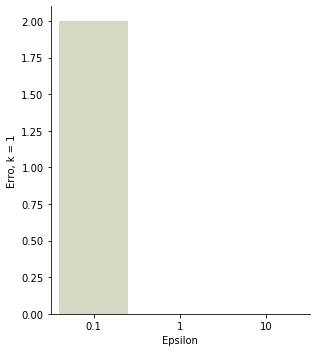

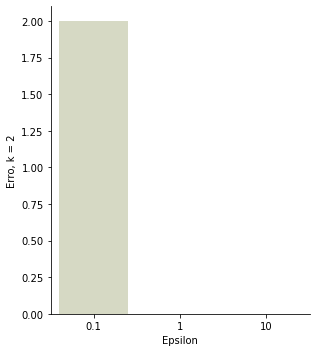

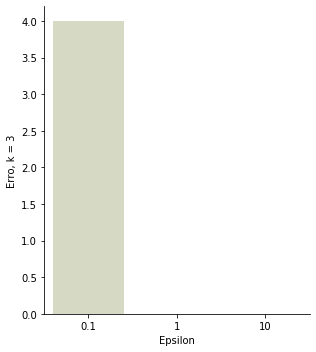

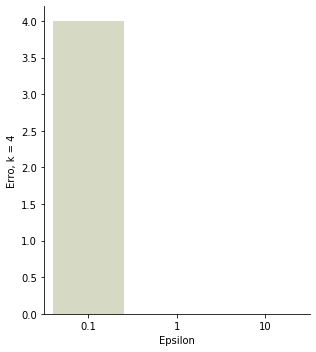

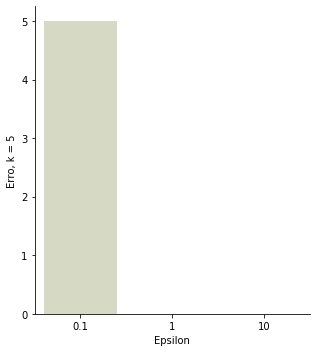

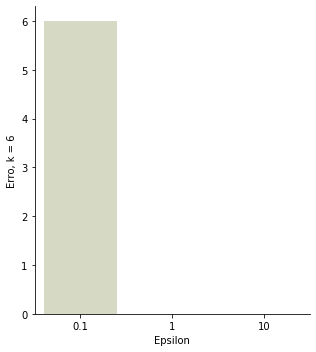

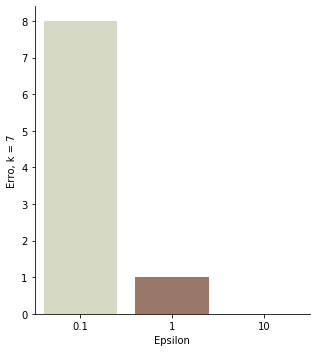

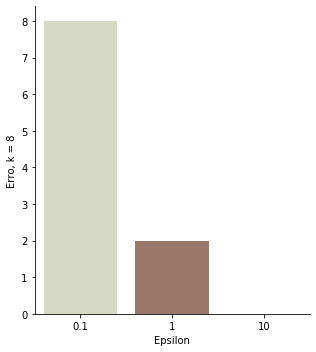

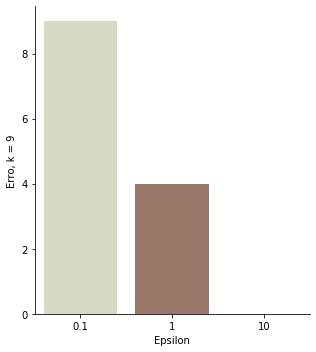

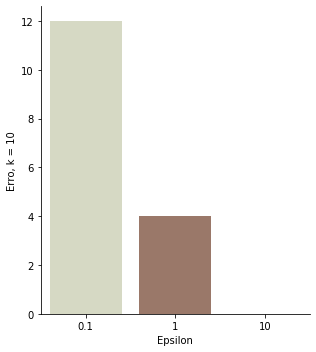

In [444]:
for i in range(0, k):
    plot_erros(aux_idades[i], i+1)

# Mecanismo Exponencial

In [255]:
def score_function_exp(dataset):
    return -dataset['count']

In [332]:
def sensibilidade_exp(dataset, budget, k):
    smooth_functions = [1]*len(dataset['count'])
    beta = budget/k
    otimo = 0
    for smooth in smooth_functions:
        otimo = max(otimo, (smooth*math.exp(-beta)))
    return otimo

In [391]:
def erros_exp(query, argumento_consulta, k):
    erros_exponencial = []
    top = list(query)
    for argumento in argumento_consulta:
        erro_argumento_exp = [0]*10
        for i in range(len(argumento)):
            if(argumento[i] in top):
                if(argumento[i] == top[i]):
                    erro = 0
                else:
                    erro = abs(top.index(argumento[i]) - i)
            else:
                erro = 20
            erro_argumento_exp[i]  = erro
        erros_exponencial.append(erro_argumento_exp)
    return erros_exponencial

# TESTE F1 SCORE

epsilon = 0.1:
Verdadeiros Positivos: 2
Falsos Positivos: 8
Falsos Negativos: 3


epsilon = 1:
Verdadeiros Positivos: 3
Falsos Positivos: 7
Falsos Negativos: 1


epsilon = 10:
Verdadeiros Positivos: 7
Falsos Positivos: 3
Falsos Negativos: 1


[0.26666666666666666, 0.4285714285714285, 0.7777777777777777]


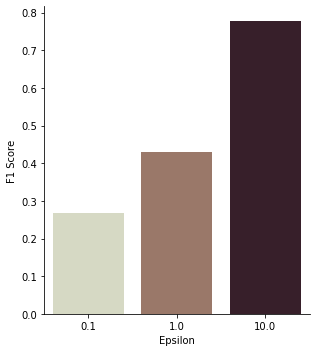

In [440]:
top = list(query_idades_exp)
erros_exponencial = []
for argumento, budget in zip(idades_exp, [0.1, 1, 10]):
    falsos_positivos, falsos_negativos, verdadeiros_positivos = 0, 0, 0
    for i in range(len(argumento)):
        if(argumento[i] in top):
            if(argumento[i] == top[i]):
                verdadeiros_positivos += 1
            else:
                falsos_positivos += 1
        if(top[i] not in argumento):
            falsos_negativos += 1
        if(argumento[i] not in top):
            falsos_positivos += 1
            
    print("epsilon = {}:\nVerdadeiros Positivos: {}\nFalsos Positivos: {}\nFalsos Negativos: {}\n\n".format(budget, verdadeiros_positivos, falsos_positivos, falsos_negativos))

    precisao = verdadeiros_positivos/(verdadeiros_positivos + falsos_positivos) 
    revocacao = verdadeiros_positivos/(verdadeiros_positivos + falsos_negativos)

    f1_score = 2*((revocacao * precisao)/(revocacao + precisao))
    erros_exponencial.append(f1_score)
    
print(erros_exponencial)

df_score = pd.DataFrame({"budgets": [0.1, 1, 10], "f1-score": erros_exponencial})

sns.catplot(x="budgets", y="f1-score", palette="ch:.5",
                data=df_score, saturation=.7,
                kind="bar", ci=None, aspect=.9)

plt.xlabel("Epsilon")
plt.ylabel("F1 Score")
plt.show()

# Consulta Idade Exponencial

In [411]:
def exp_idades(budget, sensibilidade, dataset, k):
    budget = budget/k

    scores = score_function_exp(dataset)

    _users = list(dataset['idade'].copy())
    _scores = list(scores.copy())

    top = []

    for i_run in range(k):

        probabilities = []

        for j_score in _scores:
            probability = math.exp( (budget * j_score) / (2 * sensibilidade) )
            probabilities.append(probability)

        probabilities = [j_probability/sum(probabilities) for j_probability in probabilities]

        sample = random.choices(population=_users, weights=probabilities, k=1)[0]

        top.append(sample)

        _scores.remove(_scores[_users.index(sample)])
        _users.remove(sample)

    return top

In [428]:
budgets = [0.1, 1, 10]
idades_exp = []

for budget in budgets:
    b = exp_idades(budget, sensibilidade_exp(dataset_idade, budget, 10), dataset_idade, 10)
    b = np.array(b)
    print("epsilon: {}\nreverse top-k:\n{}\n\n".format(budget, b))
    #idades_exp.append(b[:,0])
    idades_exp.append(b)

epsilon: 0.1
reverse top-k:
['[61:65]' '[66:70]' '[1:5]' '[86:90]' '[51:55]' '[6:10]' '[81:85]'
 '[76:80]' '[46:50]' '[56:60]']


epsilon: 1
reverse top-k:
['[6:10]' '[76:80]' '[1:5]' '[11:15]' '[61:65]' '[66:70]' '[86:90]'
 '[16:20]' '[91:95]' '[56:60]']


epsilon: 10
reverse top-k:
['[6:10]' '[86:90]' '[1:5]' '[91:95]' '[11:15]' '[81:85]' '[76:80]'
 '[16:20]' '[66:70]' '[71:75]']




In [425]:
query_idades_exp = top_k_reverse_idade(dataset_idade, 10)['idade']
erros_idade_exp = erros_exp(query_idades_exp, idades_exp, 10)
exp_plot_idades = []
for i in range(k):
    p_cada_k = []
    for b in range(len(budgets)):
        aux = erros_idade_exp[b][i]
        p_cada_k.append(aux)
    exp_plot_idades.append(p_cada_k)

In [426]:
copia_idades_exp = exp_plot_idades.copy()
aux_idades_exp = []
aux_idades_exp.append(copia_idades_exp[0])
for i in range(1, k):
    copia_idades_exp[i][0] += copia_idades_exp[i-1][0] 
    copia_idades_exp[i][1] += copia_idades_exp[i-1][1] 
    copia_idades_exp[i][2] += copia_idades_exp[i-1][2]
    aux_idades_exp.append([copia_idades_exp[i][0], copia_idades_exp[i][1], copia_idades_exp[i][2]])
aux_idades_exp

[[20, 3, 0],
 [23, 4, 0],
 [43, 24, 0],
 [44, 26, 0],
 [47, 28, 0],
 [51, 48, 0],
 [52, 53, 0],
 [72, 53, 0],
 [92, 57, 0],
 [95, 77, 20]]

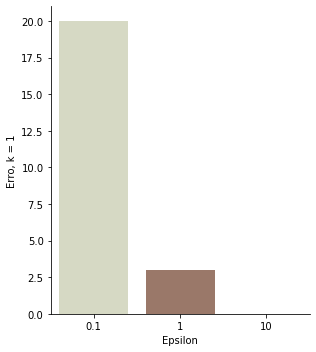

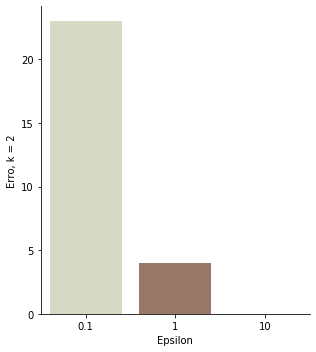

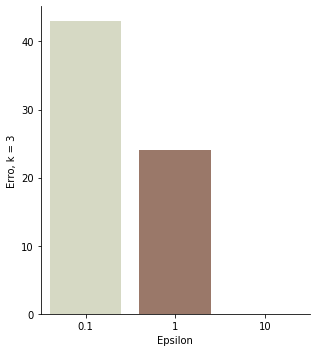

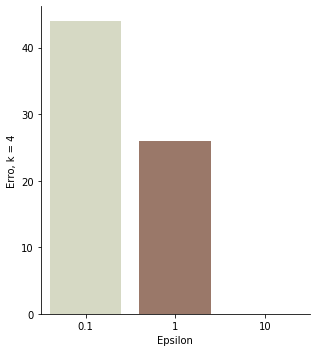

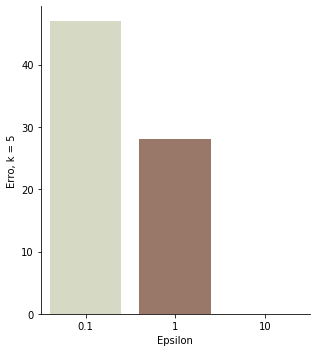

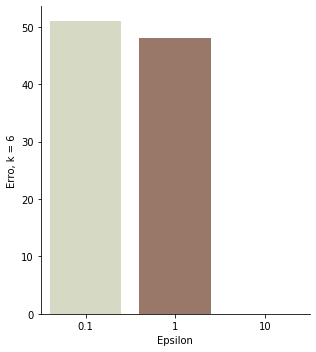

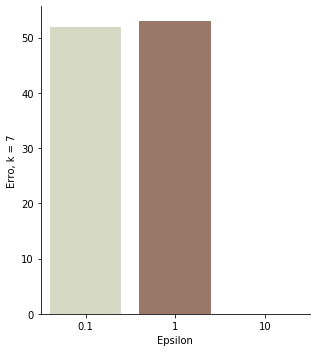

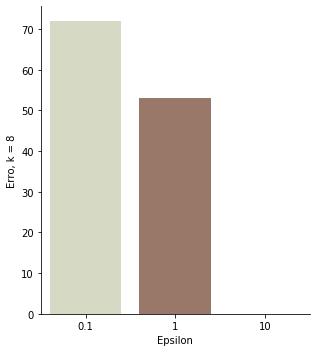

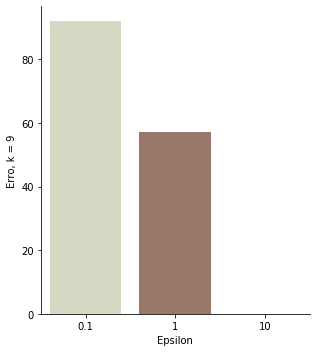

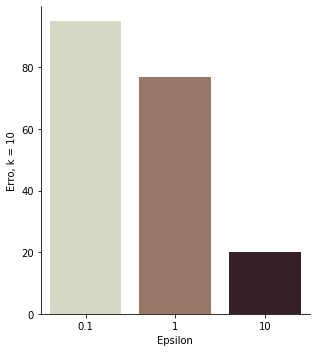

In [443]:
for i in range(0, k):
    plot_erros(aux_idades_exp[i], i+1)